In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)


In [19]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [20]:
IMAGE_SIZE = [224, 224]
train_path = 'D:\\Finalyear\\train\*'
valid_path = 'D:\\Finalyear\\test\*'

In [21]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [22]:
for layer in vgg.layers:
    layer.trainable = False

In [23]:

folders = glob(train_path)

In [24]:
folders

['D:\\Finalyear\\train\\Astrocitoma T1',
 'D:\\Finalyear\\train\\Astrocitoma T1C+',
 'D:\\Finalyear\\train\\Astrocitoma T2',
 'D:\\Finalyear\\train\\Carcinoma T1',
 'D:\\Finalyear\\train\\Carcinoma T1C+',
 'D:\\Finalyear\\train\\Carcinoma T2',
 'D:\\Finalyear\\train\\Ependimoma',
 'D:\\Finalyear\\train\\Ganglioglioma',
 'D:\\Finalyear\\train\\Germinoma T1C+',
 'D:\\Finalyear\\train\\Germinoma T2',
 'D:\\Finalyear\\train\\Glioblastoma T1',
 'D:\\Finalyear\\train\\Glioblastoma T2',
 'D:\\Finalyear\\train\\Glioma T2',
 'D:\\Finalyear\\train\\Granuloma T2',
 'D:\\Finalyear\\train\\Meningioma T1C',
 'D:\\Finalyear\\train\\Meningioma T1C+',
 'D:\\Finalyear\\train\\Neurocitoma T1',
 'D:\\Finalyear\\train\\Neurocitoma T1C',
 'D:\\Finalyear\\train\\Neurocitoma T2',
 'D:\\Finalyear\\train\\Oligodendroglioma T2',
 'D:\\Finalyear\\train\\Outros Tipos de Lesões T1',
 'D:\\Finalyear\\train\\Outros Tipos de Lesões T1C',
 'D:\\Finalyear\\train\\Outros Tipos de Lesões T2',
 'D:\\Finalyear\\train\\Papil

In [25]:

x = Flatten()(vgg.output)

In [26]:
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)

In [27]:
prediction

<KerasTensor: shape=(None, 28) dtype=float32 (created by layer 'dense_1')>

In [28]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [29]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True
                                  )

test_datagen = ImageDataGenerator(rescale = 1./255)

In [36]:
training_set = train_datagen.flow_from_directory('D:\\Finalyear\\train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 5339 images belonging to 28 classes.


In [37]:
test_set = test_datagen.flow_from_directory('D:\\Finalyear\\test',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical',shuffle=False)

Found 280 images belonging to 28 classes.


In [38]:
test_set.filenames

['Astrocitoma T1\\0c14dccd685d7ce330d14fa7a1f53dc756e73aff2f03afc1b09a7efc410f1804_big_gallery.jpeg',
 'Astrocitoma T1\\1b829d504373126112d3a30ca488a6_big_gallery.jpeg',
 'Astrocitoma T1\\1c0238417532d40ffca1c260427b39_big_gallery.jpeg',
 'Astrocitoma T1\\1d0f25e228a7078503a9f0c97ea738c5eed46c3de3dc3215b60c8add9aa77a62_big_gallery.jpeg',
 'Astrocitoma T1\\1ddfe350879837a569a4dc3c4a8aad07b0894e57aff90f0f3e4d80b47ff818dc_big_gallery.jpeg',
 'Astrocitoma T1\\1e954d53fb29f566bd2139bd7ab62c_big_gallery.jpeg',
 'Astrocitoma T1\\2b3807ee746d48e1ef3e694198c6eb19c41303f767b0da46365c6812911a17ed_big_gallery.jpeg',
 'Astrocitoma T1\\3a5be5d34a857fe9a4ce1e7dc03779_big_gallery.jpeg',
 'Astrocitoma T1\\3b964803d1f2f56863ed34328867ef6c048592cbad014c82c6ff128deabedf64_big_gallery.jpeg',
 'Astrocitoma T1\\3cb4d3297725622308b79ef3cae91a_big_gallery.jpeg',
 'Astrocitoma T1C+\\0efabbe6953569fb6ee340fe69ae51368cc5feb5eb9e9634a61d4337a6f41d27_big_gallery.jpeg',
 'Astrocitoma T1C+\\1f1291f56ed59c15a34e1d62d4

In [39]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/30
334/334 [==============================] - 96s 245ms/step - loss: 1.6743 - accuracy: 0.6203 - val_loss: 1.1230 - val_accuracy: 0.7071
Epoch 2/30
334/334 [==============================] - 55s 163ms/step - loss: 0.9534 - accuracy: 0.7513 - val_loss: 0.8750 - val_accuracy: 0.7357
Epoch 3/30
334/334 [==============================] - 55s 164ms/step - loss: 0.7810 - accuracy: 0.7818 - val_loss: 1.0569 - val_accuracy: 0.7643
Epoch 4/30
334/334 [==============================] - 55s 165ms/step - loss: 0.7680 - accuracy: 0.7977 - val_loss: 0.5985 - val_accuracy: 0.8714
Epoch 5/30
334/334 [==============================] - 55s 163ms/step - loss: 0.6926 - accuracy: 0.8164 - val_loss: 0.7595 - val_accuracy: 0.8250
Epoch 6/30
334/334 [==============================] - 55s 165ms/step - loss: 0.6954 - accuracy: 0.8164 - val_loss: 0.5846 - val_accuracy: 0.8464
Epoch 7/30
334/334 [==============================] - 55s 166ms/step - loss: 0.7200 - accuracy: 0.8260 - val_loss: 0.6041 - val_ac

In [40]:
import matplotlib.pyplot as plt

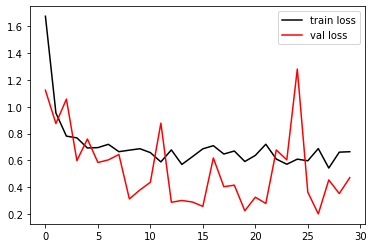

<Figure size 432x288 with 0 Axes>

In [41]:
plt.plot(r.history['loss'], label='train loss',color="black")
plt.plot(r.history['val_loss'], label='val loss',color="red")
plt.legend()
plt.show()
plt.savefig('LossVal_loss')




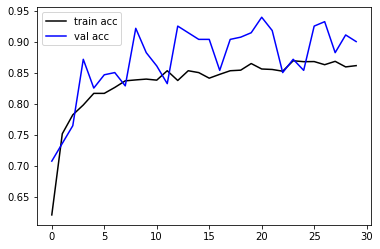

<Figure size 432x288 with 0 Axes>

In [42]:
plt.plot(r.history['accuracy'], label='train acc',color="black")
plt.plot(r.history['val_accuracy'], label='val acc',color="blue")
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [43]:

from tensorflow.keras.models import load_model
model.save('model_vgg16t1.h5')


In [44]:
model=load_model('model_vgg16t1.h5')

In [45]:
y_pred = model.predict(test_set)
y_pred

18/18 [==============================] - 2s 130ms/step


array([[1.0000000e+00, 2.0639506e-09, 8.1067730e-17, ..., 3.1843694e-27,
        2.2896533e-21, 1.6590337e-11],
       [9.9996936e-01, 1.6299664e-06, 5.7548302e-12, ..., 4.5804282e-24,
        3.0349770e-20, 1.3897209e-12],
       [9.9999988e-01, 1.5019879e-08, 2.2873729e-15, ..., 3.5209396e-30,
        1.3390920e-23, 1.9997186e-11],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [3.6568907e-27, 6.2312986e-25, 5.5176448e-29, ..., 5.1441157e-34,
        2.5281588e-28, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 2.8279039e-37, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00]], dtype=float32)

In [46]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, 12,  2,  2,  9, 12, 12,  2, 12, 12, 12,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  6,  9,  6,  5,  9,  9,  5,  5, 12,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10,  9, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 19, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 15, 15, 14, 14, 15, 15, 14, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
        9, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 12, 12, 19, 19, 19, 12, 12, 19, 12, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [53]:
import os
path ='D:\\Finalyear\\test'
Diseases_types=os.listdir(path)

In [54]:
diseases = []
for i in Diseases_types:
  all_images = os.listdir(path + '/' +i)

  for j in all_images :
    diseases.append((i))
    print (diseases)

['Astrocitoma T1']
['Astrocitoma T1', 'Astrocitoma T1']
['Astrocitoma T1', 'Astrocitoma T1', 'Astrocitoma T1']
['Astrocitoma T1', 'Astrocitoma T1', 'Astrocitoma T1', 'Astrocitoma T1']
['Astrocitoma T1', 'Astrocitoma T1', 'Astrocitoma T1', 'Astrocitoma T1', 'Astrocitoma T1']
['Astrocitoma T1', 'Astrocitoma T1', 'Astrocitoma T1', 'Astrocitoma T1', 'Astrocitoma T1', 'Astrocitoma T1']
['Astrocitoma T1', 'Astrocitoma T1', 'Astrocitoma T1', 'Astrocitoma T1', 'Astrocitoma T1', 'Astrocitoma T1', 'Astrocitoma T1']
['Astrocitoma T1', 'Astrocitoma T1', 'Astrocitoma T1', 'Astrocitoma T1', 'Astrocitoma T1', 'Astrocitoma T1', 'Astrocitoma T1', 'Astrocitoma T1']
['Astrocitoma T1', 'Astrocitoma T1', 'Astrocitoma T1', 'Astrocitoma T1', 'Astrocitoma T1', 'Astrocitoma T1', 'Astrocitoma T1', 'Astrocitoma T1', 'Astrocitoma T1']
['Astrocitoma T1', 'Astrocitoma T1', 'Astrocitoma T1', 'Astrocitoma T1', 'Astrocitoma T1', 'Astrocitoma T1', 'Astrocitoma T1', 'Astrocitoma T1', 'Astrocitoma T1', 'Astrocitoma T1']


In [49]:
diseases

['Alzeimer',
 'Alzeimer',
 'Alzeimer',
 'Alzeimer',
 'Alzeimer',
 'Alzeimer',
 'Alzeimer',
 'Alzeimer',
 'Alzeimer',
 'Alzeimer',
 'Cognitive Impairment',
 'Cognitive Impairment',
 'Cognitive Impairment',
 'Cognitive Impairment',
 'Cognitive Impairment',
 'Cognitive Impairment',
 'Cognitive Impairment',
 'Cognitive Impairment',
 'Cognitive Impairment',
 'Cognitive Impairment',
 'Cognitive Impairment',
 'Cognitive Impairment',
 'Cognitive Impairment',
 'Cognitive Impairment',
 'Cognitive Impairment',
 'Cognitive Impairment',
 'Cognitive Impairment',
 'pituitary',
 'pituitary',
 'pituitary',
 'pituitary',
 'pituitary',
 'pituitary',
 'pituitary',
 'pituitary',
 'pituitary',
 'pituitary',
 'Stroke',
 'Stroke',
 'Stroke',
 'Stroke',
 'Stroke',
 'Stroke',
 'Stroke',
 'Stroke',
 'Stroke',
 'Stroke']

In [56]:
from sklearn.preprocessing import LabelEncoder
diseases = np.array(diseases)
diseases.reshape(280,-1)
y_labelencoder = LabelEncoder()



In [57]:
diseases

array(['Astrocitoma T1', 'Astrocitoma T1', 'Astrocitoma T1',
       'Astrocitoma T1', 'Astrocitoma T1', 'Astrocitoma T1',
       'Astrocitoma T1', 'Astrocitoma T1', 'Astrocitoma T1',
       'Astrocitoma T1', 'Astrocitoma T1C+', 'Astrocitoma T1C+',
       'Astrocitoma T1C+', 'Astrocitoma T1C+', 'Astrocitoma T1C+',
       'Astrocitoma T1C+', 'Astrocitoma T1C+', 'Astrocitoma T1C+',
       'Astrocitoma T1C+', 'Astrocitoma T1C+', 'Astrocitoma T2',
       'Astrocitoma T2', 'Astrocitoma T2', 'Astrocitoma T2',
       'Astrocitoma T2', 'Astrocitoma T2', 'Astrocitoma T2',
       'Astrocitoma T2', 'Astrocitoma T2', 'Astrocitoma T2',
       'Carcinoma T1', 'Carcinoma T1', 'Carcinoma T1', 'Carcinoma T1',
       'Carcinoma T1', 'Carcinoma T1', 'Carcinoma T1', 'Carcinoma T1',
       'Carcinoma T1', 'Carcinoma T1', 'Carcinoma T1C+', 'Carcinoma T1C+',
       'Carcinoma T1C+', 'Carcinoma T1C+', 'Carcinoma T1C+',
       'Carcinoma T1C+', 'Carcinoma T1C+', 'Carcinoma T1C+',
       'Carcinoma T1C+', 'Carci

In [59]:
y_test = y_labelencoder.fit_transform (diseases)
y_test = np.array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23,
       23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26,
       26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27])

In [60]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  3,  0,  0,  0,  0,  0,  0,  1,  0,  0,  6,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  5,  2,  0,  0,  3,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  9,  0,  0,  0,  0,  0,  1,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 10,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  

In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      0.30      0.46        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        10
           5       1.00      0.50      0.67        10
           6       0.82      0.90      0.86        10
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00        10
           9       0.62      1.00      0.77        10
          10       1.00      1.00      1.00        10
          11       1.00      0.90      0.95        10
          12       0.43      0.90      0.58        10
          13       1.00      1.00      1.00        10
          14       1.00      0.30      0.46        10
          15       0.59      1.00      0.74        10
          16       1.00      1.00      1.00        10
          17       1.00    

In [62]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9395730706075534

In [63]:
from sklearn.metrics import precision_score
precision_score(y_test,y_pred,average='micro')

0.9

In [64]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9

In [65]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred,average='micro')

0.9

In [66]:
from sklearn.metrics import recall_score
recall_score(y_test,y_pred,average='micro')

0.9

In [67]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

In [71]:
from sklearn.metrics import confusion_matrix
import pandas as pd
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index = ['Astrocitoma T1','Astrocitoma T1C+', 'Carcinoma T1', 'Carcinoma T1C+','Carcinoma T2', 'Ependimoma', 'Ganglioglioma', 'Glioblastoma T1', 'Glioma T2', 'Glioma T2', 'Glioma T2','Granuloma T2', 
        'Meningioma T1C', 'Meningioma T1C+', 'Neurocitoma T1', 'Neurocitoma T1C', 'Neurocitoma T2','Oligodendroglioma T2','Outros Tipos de Lesões T1', 'Outros Tipos de Lesões T1C','Outros Tipos de Lesões T2','Papiloma T1C+', 'Papiloma T1C+', 'pituitary',
       'Schwannoma T1', 'Schwannoma T1', 'Schwannoma T1C', 'Stroke'], 
                     columns = ['Astrocitoma T1','Astrocitoma T1C+', 'Carcinoma T1', 'Carcinoma T1C+','Carcinoma T2', 'Ependimoma', 'Ganglioglioma', 'Glioblastoma T1', 'Glioma T2', 'Glioma T2', 'Glioma T2','Granuloma T2', 
        'Meningioma T1C', 'Meningioma T1C+', 'Neurocitoma T1', 'Neurocitoma T1C', 'Neurocitoma T2','Oligodendroglioma T2','Outros Tipos de Lesões T1', 'Outros Tipos de Lesões T1C','Outros Tipos de Lesões T2','Papiloma T1C+', 'Papiloma T1C+', 'pituitary',
       'Schwannoma T1', 'Schwannoma T1', 'Schwannoma T1C', 'Stroke'])

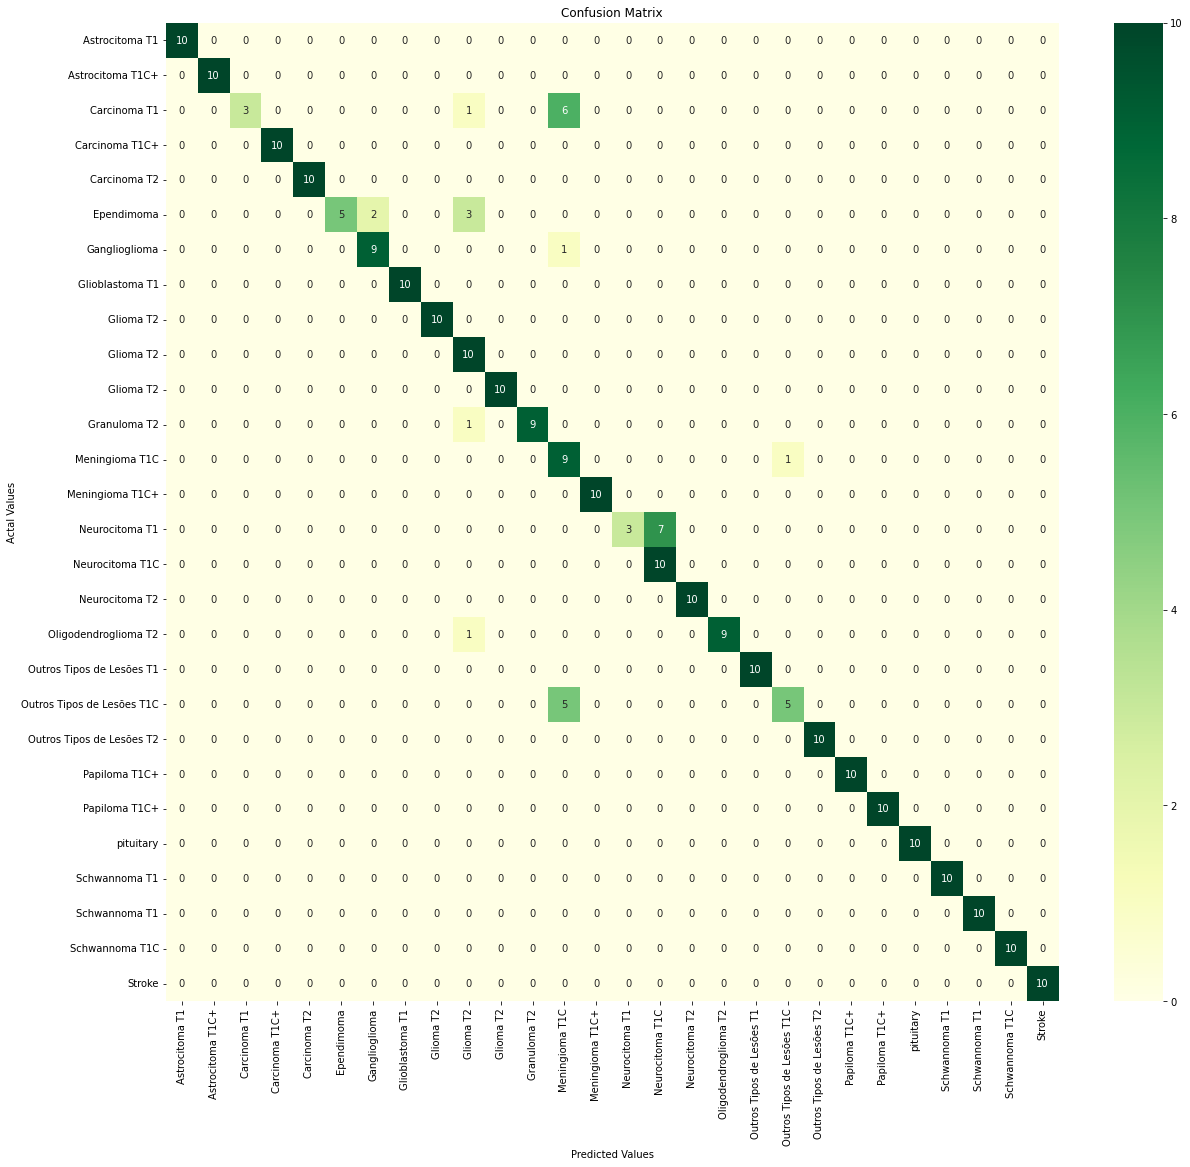

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,18))
custom_cmap = sns.color_palette("YlGn", as_cmap=True)
sns.heatmap(cm_df, annot=True, cmap=custom_cmap)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [86]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [111]:
img=image.load_img('D:\\Finalyear\\Neurocitomat1ctest.jpeg',target_size=(224,224))

In [112]:
x=image.img_to_array(img)
x

array([[[4., 4., 4.],
        [4., 4., 4.],
        [4., 4., 4.],
        ...,
        [4., 4., 4.],
        [4., 4., 4.],
        [3., 3., 3.]],

       [[4., 4., 4.],
        [4., 4., 4.],
        [4., 4., 4.],
        ...,
        [4., 4., 4.],
        [4., 4., 4.],
        [3., 3., 3.]],

       [[4., 4., 4.],
        [4., 4., 4.],
        [4., 4., 4.],
        ...,
        [4., 4., 4.],
        [4., 4., 4.],
        [3., 3., 3.]],

       ...,

       [[4., 4., 4.],
        [4., 4., 4.],
        [4., 4., 4.],
        ...,
        [4., 4., 4.],
        [4., 4., 4.],
        [3., 3., 3.]],

       [[4., 4., 4.],
        [4., 4., 4.],
        [4., 4., 4.],
        ...,
        [4., 4., 4.],
        [5., 5., 5.],
        [3., 3., 3.]],

       [[4., 4., 4.],
        [4., 4., 4.],
        [4., 4., 4.],
        ...,
        [4., 4., 4.],
        [4., 4., 4.],
        [3., 3., 3.]]], dtype=float32)

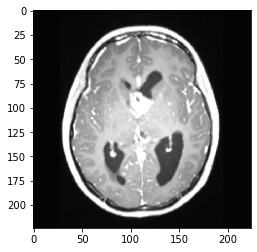

In [113]:
from matplotlib.pyplot import imshow
imshow(img)

In [114]:
x=x/255

In [115]:
x


array([[[0.01568628, 0.01568628, 0.01568628],
        [0.01568628, 0.01568628, 0.01568628],
        [0.01568628, 0.01568628, 0.01568628],
        ...,
        [0.01568628, 0.01568628, 0.01568628],
        [0.01568628, 0.01568628, 0.01568628],
        [0.01176471, 0.01176471, 0.01176471]],

       [[0.01568628, 0.01568628, 0.01568628],
        [0.01568628, 0.01568628, 0.01568628],
        [0.01568628, 0.01568628, 0.01568628],
        ...,
        [0.01568628, 0.01568628, 0.01568628],
        [0.01568628, 0.01568628, 0.01568628],
        [0.01176471, 0.01176471, 0.01176471]],

       [[0.01568628, 0.01568628, 0.01568628],
        [0.01568628, 0.01568628, 0.01568628],
        [0.01568628, 0.01568628, 0.01568628],
        ...,
        [0.01568628, 0.01568628, 0.01568628],
        [0.01568628, 0.01568628, 0.01568628],
        [0.01176471, 0.01176471, 0.01176471]],

       ...,

       [[0.01568628, 0.01568628, 0.01568628],
        [0.01568628, 0.01568628, 0.01568628],
        [0.01568628, 0

In [116]:
import cv2
x = cv2.resize(x,(224,224)) 
x = x.reshape(1,224,224,3) 

In [117]:
x.shape

(1, 224, 224, 3)

In [118]:
model.predict(x)

1/1 [==============================] - 0s 21ms/step


array([[3.9902157e-17, 9.8431289e-02, 5.2612954e-08, 1.6762406e-12,
        1.2448164e-12, 1.0032950e-20, 1.3267847e-08, 3.4141914e-13,
        8.9394270e-08, 8.8319069e-01, 6.9960830e-23, 2.7975282e-11,
        1.8436558e-06, 1.8173199e-22, 2.4437194e-04, 9.7685456e-03,
        7.2895426e-11, 8.3615063e-03, 3.3113896e-09, 7.1992833e-12,
        1.3251868e-11, 1.5884216e-06, 8.0795995e-11, 2.7199194e-16,
        1.7730127e-25, 4.3065014e-21, 4.1520244e-14, 6.0043306e-14]],
      dtype=float32)

In [119]:
a=model.predict(x)

1/1 [==============================] - 0s 20ms/step


In [120]:
a.argmax()

9

In [121]:
folders

['D:\\Finalyear\\train\\Astrocitoma T1',
 'D:\\Finalyear\\train\\Astrocitoma T1C+',
 'D:\\Finalyear\\train\\Astrocitoma T2',
 'D:\\Finalyear\\train\\Carcinoma T1',
 'D:\\Finalyear\\train\\Carcinoma T1C+',
 'D:\\Finalyear\\train\\Carcinoma T2',
 'D:\\Finalyear\\train\\Ependimoma',
 'D:\\Finalyear\\train\\Ganglioglioma',
 'D:\\Finalyear\\train\\Germinoma T1C+',
 'D:\\Finalyear\\train\\Germinoma T2',
 'D:\\Finalyear\\train\\Glioblastoma T1',
 'D:\\Finalyear\\train\\Glioblastoma T2',
 'D:\\Finalyear\\train\\Glioma T2',
 'D:\\Finalyear\\train\\Granuloma T2',
 'D:\\Finalyear\\train\\Meningioma T1C',
 'D:\\Finalyear\\train\\Meningioma T1C+',
 'D:\\Finalyear\\train\\Neurocitoma T1',
 'D:\\Finalyear\\train\\Neurocitoma T1C',
 'D:\\Finalyear\\train\\Neurocitoma T2',
 'D:\\Finalyear\\train\\Oligodendroglioma T2',
 'D:\\Finalyear\\train\\Outros Tipos de Lesões T1',
 'D:\\Finalyear\\train\\Outros Tipos de Lesões T1C',
 'D:\\Finalyear\\train\\Outros Tipos de Lesões T2',
 'D:\\Finalyear\\train\\Papil